# **Análise exploratória**

In [13]:
# imports

import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
df = pd.read_csv('/content/drive/MyDrive/UP/1Bimestre/2022-09-22_Casos_Covid_19_-_Base_de_Dados_Tratado.csv',
                    sep=';', encoding='iso-8859-1')

**Exibindo cabeçalho**

In [16]:
df.head()

,DATA INCLUSÃO/ NOTIFICAÇÃO,CLASSIFICAÇÃO FINAL,IDADE (anos),SEXO,BAIRRO,DISTRITO RESIDÊNCIA,INTERNADO (SIM/NÃO),DATA ÓBITO,DATA COLETA EXAME,ENCERRAMENTO
0,11/03/2020,CONFIRMADO,54,M,CRISTO REI,DSMZ,NÃO,NaN,09/03/2020,RECUPERADO
1,12/03/2020,CONFIRMADO,15,M,XAXIM,DSBQ,NÃO,NaN,08/03/2020,RECUPERADO
2,12/03/2020,CONFIRMADO,46,M,XAXIM,DSBQ,NÃO,NaN,09/03/2020,RECUPERADO
3,12/03/2020,CONFIRMADO,25,F,CRISTO REI,DSMZ,NÃO,NaN,09/03/2020,RECUPERADO
4,12/03/2020,CONFIRMADO,58,M,MERCÊS,DSMZ,NÃO,NaN,09/03/2020,RECUPERADO


In [47]:
df = df.assign(Paciente = 1)

df['Paciente'] = range(int(df['Paciente'][0]), len(df['Paciente'])+1)
df

,DATA INCLUSÃO/ NOTIFICAÇÃO,CLASSIFICAÇÃO FINAL,IDADE (anos),SEXO,BAIRRO,DISTRITO RESIDÊNCIA,INTERNADO (SIM/NÃO),DATA ÓBITO,DATA COLETA EXAME,ENCERRAMENTO,Paciente
0,11/03/2020,CONFIRMADO,54,M,CRISTO REI,DSMZ,NÃO,NaN,09/03/2020,RECUPERADO,1
1,12/03/2020,CONFIRMADO,15,M,XAXIM,DSBQ,NÃO,NaN,08/03/2020,RECUPERADO,2
2,12/03/2020,CONFIRMADO,46,M,XAXIM,DSBQ,NÃO,NaN,09/03/2020,RECUPERADO,3
3,12/03/2020,CONFIRMADO,25,F,CRISTO REI,DSMZ,NÃO,NaN,09/03/2020,RECUPERADO,4
4,12/03/2020,CONFIRMADO,58,M,MERCÊS,DSMZ,NÃO,NaN,09/03/2020,RECUPERADO,5
...,...,...,...,...,...,...,...,...,...,...,...
510184,20/09/2022,CONFIRMADO,28,M,CENTRO,DSMZ,NÃO,NaN,19/09/2022,ATIVO,510185
510185,20/09/2022,CONFIRMADO,33,F,XAXIM,DSBQ,NÃO,NaN,19/09/2022,ATIVO,510186
510186,20/09/2022,CONFIRMADO,33,F,CAMPO DE SANTANA,DSTQ,NÃO,NaN,19/09/2022,ATIVO,510187
510187,20/09/2022,CONFIRMADO,66,M,TATUQUARA,DSTQ,NÃO,NaN,19/09/2022,ATIVO,510188


**Distribuição de Frequencia**

In [48]:
grafico =  px.histogram (df,  x = "IDADE (anos)", nbins=15, color='SEXO') 
grafico.update_layout(width=500,height=500,title_text='Distribuição de Idade por Sexo',
                      title_font_color = 'black') 
grafico.show()

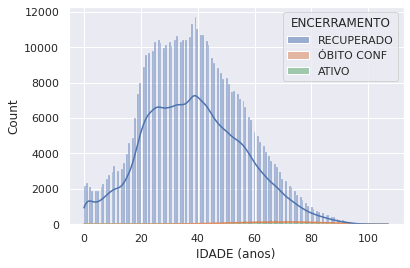

In [63]:
sns.histplot(data=df, x="IDADE (anos)", kde=True, hue="ENCERRAMENTO")

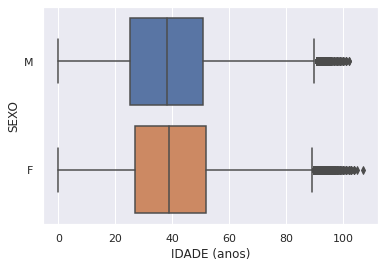

In [62]:
sns.boxplot(data=df, x="IDADE (anos)", y="SEXO")

**Correlação**

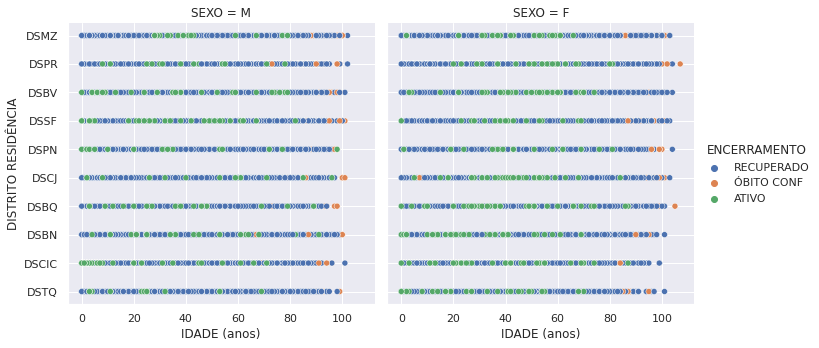

In [49]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set()
sns.relplot(
    data=df, x=df['IDADE (anos)'], y=df['DISTRITO RESIDÊNCIA'],
    col= df['SEXO'], hue=df['ENCERRAMENTO'],
    kind="scatter"
)

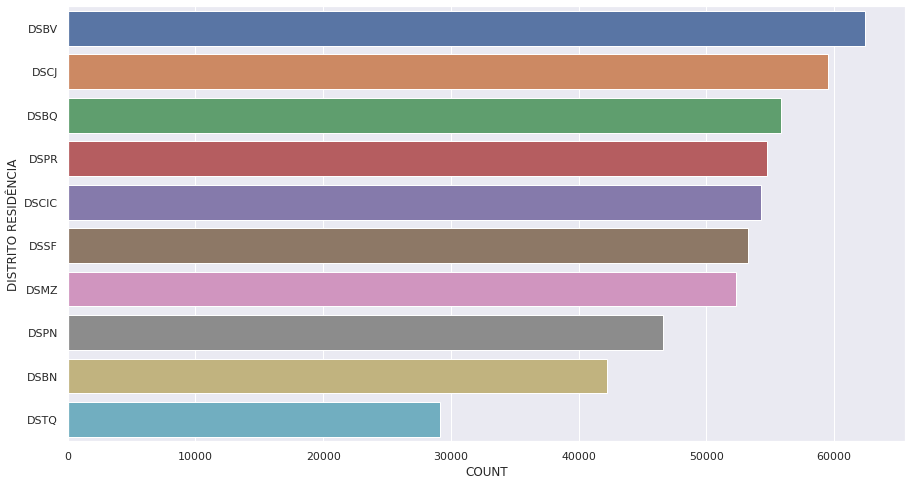

In [54]:
dfgraph = df.groupby(['DISTRITO RESIDÊNCIA']).size().reset_index(name = 'COUNT')
dfgraph = dfgraph.sort_values('COUNT')
dfgraph = dfgraph[dfgraph['COUNT'] > 100].sort_values('COUNT', ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(data=dfgraph, x="COUNT", y="DISTRITO RESIDÊNCIA", orient="h")

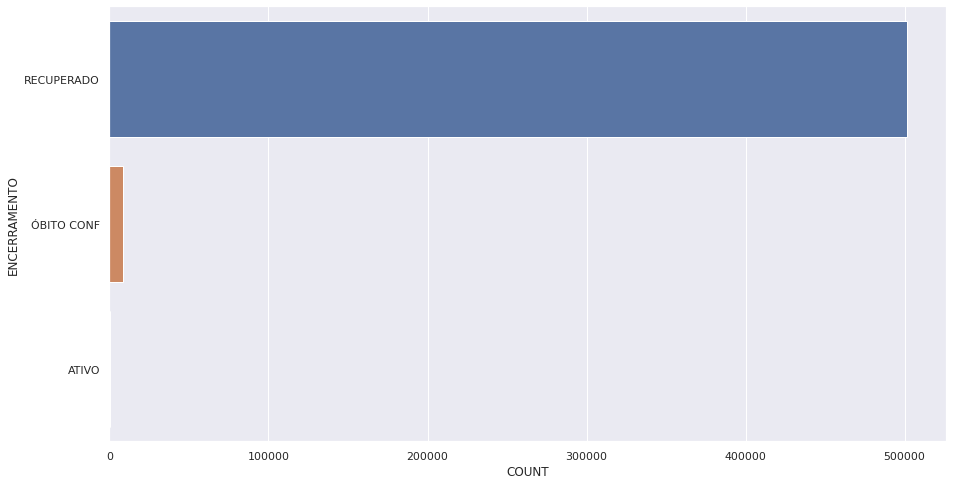

In [59]:
dfgraph = df.groupby(['ENCERRAMENTO']).size().reset_index(name = 'COUNT')
dfgraph = dfgraph.sort_values('COUNT')
dfgraph = dfgraph[dfgraph['COUNT'] > 100].sort_values('COUNT', ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(data=dfgraph, x="COUNT", y="ENCERRAMENTO", orient="h")

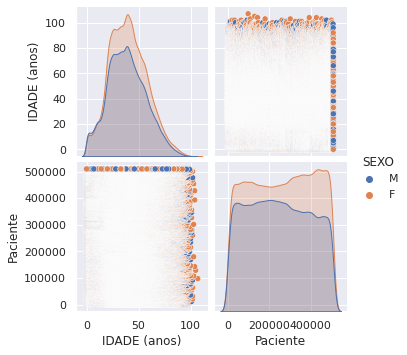

In [52]:
sns.pairplot(data=df, hue='SEXO', corner=False)

**Heat Map**

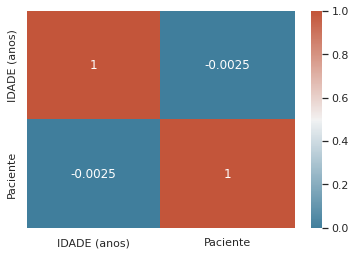

In [51]:
corr = df.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,cmap=cmap, annot=True);

**Estatística descritiva**

In [39]:
# Estatisticas de Idade

df['IDADE (anos)'].describe()

count    510189.000000
mean         39.338036
std          18.021337
min           0.000000
25%          26.000000
50%          38.000000
75%          52.000000
max         107.000000
Name: IDADE (anos), dtype: float64

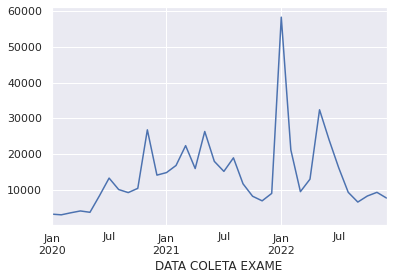

In [82]:
df.groupby(df['DATA COLETA EXAME'].dt.to_period("M")).size().plot()